Bevor wir die Daten auswerten, wollen wir uns zunächst mit den Daten vertraut machen. Das heißt, wir schauen Sie uns an. 

Durch visuelle Inspektion können wir lernen, was allen an Informationen in den Daten steckt. Außerdem können wir versuchen zu beschreiben, wie wir als menschliche Beobachterinnen diese Informationen nutzen. Erst danach sollten wir versuchen, unser intuitives Vorgehen zu formalisieren, also mit den Daten zu *rechnen*. 

Auf Grundlage von visueller Inspektion können wir auch ersteinmal *üben* Vorhersagen zu treffen. Statt sofort die verblindeten Testdaten zu dekodieren, könnte es eine gute Idee sein, zunächst Fragen zu stellen auf die wir die Antworten bereits kennen. Wir wissen Alles über die Daten in den ersten beiden runs, daher bieten diese sich zu Übungszwecken an.

Das heißt, wir können zwei Dinge tun:
1. die Daten unverblindet anschauen und versuchen Regelmäßigkeiten zu finden, welche die Blöcke auszeichnen
2. die Daten verblindet anschauen und versuchen, Vorhersagen zu treffen

Was ist der Unterschied? Bei der ersten Variante könnte es sein, dass wir interessante Muster finden, aber wir wissen nicht, wie gut unsere Vorsagen wären, wenn wir diese Muster oder Merkmale benutzen. Dabei kann man schnell in eine Denkweise verfallen, bei der man jeglichem zufälligem Rauschen Bedeutsamkeit zuschreibt.

Bei der zweiten Variante (verblindet) haben wir auch ein Maß dafür, wie prädiktiv die Muster oder Merkmale sein könnten. Wir kriegen Feedback darüber, was funktioniert und was nicht. Das ist eine gute Vorbereitung für die tatsächliche Vorhersage von runs 3+4. Die beste Übung um Vorhersagen zu treffen, ist Vorhersagen zu treffen.

### Blindes Training

Wir haben in dem Ordner "blindTraining" Hirnbilder von jedem Block, aber ohne die Namen. Die Namen stehen jeweils in der entsprechenden Textdatei. Ein mögliches Training wäre nun, sich ein Bild anzuschauen, eine Vorhersage zu treffen und dann die eigene Vorhersage mit Hilfe der hinterlegten Textdatei zu überprüfen.

In [1]:
# module um dateien zu lesen
import os
import fnmatch

In [2]:
# liste mit allen hirnbildern die im Ordner blindTraining liegen
imgList = ['../blindTraining/%s'%x for x in os.listdir('../blindTraining/') if x.endswith('.nii.gz')]
imgList.sort()

In [6]:
imgList

['../blindTraining/s00num000.nii.gz',
 '../blindTraining/s00num001.nii.gz',
 '../blindTraining/s00num002.nii.gz',
 '../blindTraining/s00num003.nii.gz',
 '../blindTraining/s00num004.nii.gz',
 '../blindTraining/s00num005.nii.gz',
 '../blindTraining/s00num006.nii.gz',
 '../blindTraining/s00num007.nii.gz',
 '../blindTraining/s00num008.nii.gz',
 '../blindTraining/s00num009.nii.gz',
 '../blindTraining/s00num010.nii.gz',
 '../blindTraining/s00num011.nii.gz',
 '../blindTraining/s00num012.nii.gz',
 '../blindTraining/s00num013.nii.gz',
 '../blindTraining/s00num014.nii.gz',
 '../blindTraining/s00num015.nii.gz',
 '../blindTraining/s00num016.nii.gz',
 '../blindTraining/s00num017.nii.gz',
 '../blindTraining/s00num018.nii.gz',
 '../blindTraining/s00num019.nii.gz',
 '../blindTraining/s00num020.nii.gz',
 '../blindTraining/s00num021.nii.gz',
 '../blindTraining/s00num022.nii.gz',
 '../blindTraining/s00num023.nii.gz',
 '../blindTraining/s00num024.nii.gz',
 '../blindTraining/s00num025.nii.gz',
 '../blindTr

Liste mit allen Antworten

In [7]:
# liste mit allen hirnbildern die im Ordner blindTraining liegen
codeList = ['../blindTraining/%s'%x for x in os.listdir('../blindTraining/') if x.startswith('blockCode')]
codeList.sort()

In [8]:
codeList

['../blindTraining/blockCode000.csv',
 '../blindTraining/blockCode001.csv',
 '../blindTraining/blockCode002.csv',
 '../blindTraining/blockCode003.csv',
 '../blindTraining/blockCode004.csv',
 '../blindTraining/blockCode005.csv',
 '../blindTraining/blockCode006.csv',
 '../blindTraining/blockCode007.csv',
 '../blindTraining/blockCode008.csv',
 '../blindTraining/blockCode009.csv',
 '../blindTraining/blockCode010.csv',
 '../blindTraining/blockCode011.csv',
 '../blindTraining/blockCode012.csv',
 '../blindTraining/blockCode013.csv',
 '../blindTraining/blockCode014.csv',
 '../blindTraining/blockCode015.csv',
 '../blindTraining/blockCode016.csv',
 '../blindTraining/blockCode017.csv',
 '../blindTraining/blockCode018.csv',
 '../blindTraining/blockCode019.csv',
 '../blindTraining/blockCode020.csv',
 '../blindTraining/blockCode021.csv',
 '../blindTraining/blockCode022.csv',
 '../blindTraining/blockCode023.csv',
 '../blindTraining/blockCode024.csv',
 '../blindTraining/blockCode025.csv',
 '../blindTr

### Beispiel:

Wir haben von jedem Block drei Bilder:
- kein Smoothing (s00)
- 4mm Smoothing (s04)
- 8mm Smoothing (s08)

In [9]:
from nilearn import plotting
import matplotlib.pylab as plt
%matplotlib inline

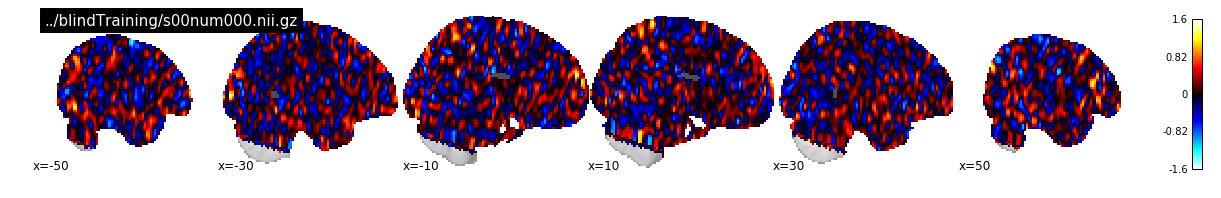

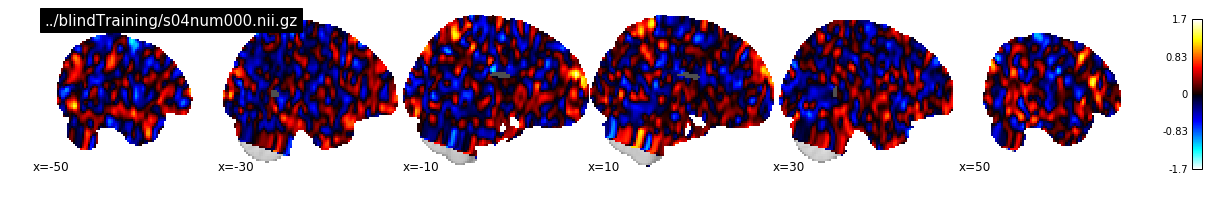

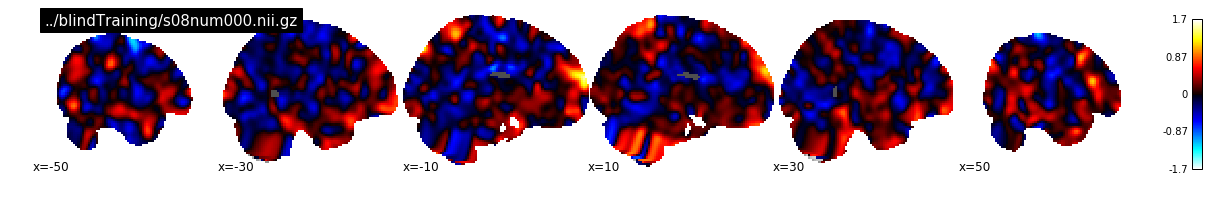

In [12]:
for img in imgList[::40]:
    plotting.plot_stat_map(img,title=img,display_mode='x',cut_coords=(-50,-30,-10,10,30,50))
    plt.show()

Diese Bilder können wir uns z.B. mit FSLView oder mricroGL anschauen; entweder einzeln oder kombiniert (so könnten wir auch etwas über den Effekt der Glättung auf unterschiedliche Regionen lernen).

In [15]:
%%bash

fslview ../data/wbet2mm.nii.gz ../blindTraining/s00num000.nii.gz ../blindTraining/s08num000.nii.gz

Danach können wir uns die Auflösung anschauen

In [16]:
%%bash

gedit ../blindTraining/blockCode000.csv


** (gedit:6605): WARNING **: Couldn't connect to accessibility bus: Failed to connect to socket /tmp/dbus-5YkokyAjVY: Connection refused


In [17]:
with open('../blindTraining/blockCode000.csv','r') as f:
    print f.read()

filename,code
EMOTION_013_Negativ-Klippe,000


Jede Art von Darstellung, Glättung und Schwellenwert sind erlaubt, ebenso Wikipedia, Neurosynth, Atlanten, Darstellung im Volumen oder auf der Hirnoberfläche etc.
Eine weitere Hilfe könnten die gemittelten Hirnantworten pro Bedingung sein. D.h. es könnte Sinn machen zu schauen, wie eigentlich die 5-Minuten langen Mittlungen pro Bedingung aussehen. Zur Erinnerung: Diese liegen in

    >> ../meanData/
    
Außerdem sind sie auch online auf [neurovault.org](https://neurovault.org/collections/3521/)

In [14]:
%%bash

fslview ../data/wbet2mm.nii.gz -l Grey -b 200,1000 ../meanData/s08EMOTION.nii.gz  -l Red-Yellow -b 0.2,1.0 

In [21]:
from IPython.display import IFrame
IFrame('https://neurovault.org/collections/3521/', width=800, height=600)

### Viel Erfolg!